In [14]:
from __future__ import print_function, division
%run basics.ipynb

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Loading BokehJS ...

In [3]:
df = pd.read_pickle('clf.df')
course_desc = pd.read_csv('udacity_courses.csv', index_col='id')
course_desc.head(2)

,title,homepage,subtitle,level,starter,image,banner_image,teaser_video,summary,short_summary,required_knowledge,expected_learning,featured,syllabus,faq,full_course_available,expected_duration,expected_duration_unit,new_release
id,,,,,,,,,,,,,,,,,,,
bio110,Tales from the Genome,https://www.udacity.com/course/tales-from-the-...,Introduction to Genetics for Beginners,beginner,False,https://lh5.ggpht.com/Fh07_XbT61CGDWsQoOMQaIeH...,https://lh4.ggpht.com/_AHqr0EXcLBzF0rrwtBagE0t...,https://www.youtube.com/watch?v=sEXrjh-tme8,This course is a journey into the biology of t...,"Learn the basics of genetics, with a personal ...",No previous experience in genetics is necessar...,You will learn about fundamental principles of...,False,## Lesson 1: Introduction to traits and heredi...,NaN,False,3,months,False
cs046,Intro to Java Programming,https://www.udacity.com/course/intro-to-java-p...,Building Programs with Classes & Objects,beginner,False,https://lh4.ggpht.com/9ytiUdz0QYHwuMJFTXcNXZn4...,https://lh3.ggpht.com/AdAALPYhCsWuIvDl0ZY6zIW2...,https://www.youtube.com/watch?v=Wsp5Rrenoq4,"In this introductory course, you'll learn and ...",Learn essential computer science and object-or...,No prior programming experience and knowledge ...,Java is one of the most popular programming la...,False,"### Lesson 1: Introduction to Computers, Progr...",NaN,True,4,months,False


In [4]:
print(df.columns)
print(len(df))
df.head(2)

Index([u'idx', u'jdx', u'vec-diff', u'cos-sim', u'euc-dist', u'man-dist',
       u'bin_diff', u'max_diff', u'mean_diff', u'median_diff', u'v1_max',
       u'v2_max', u'v1_min', u'v2_min', u'v1_mean', u'v2_mean', u'v1_median',
       u'v2_median', u'v1_count', u'v2_count', u'v1_n_chars', u'v1_n_words',
       u'v2_n_chars', u'v2_n_words', u'v1_flesch', u'v2_flesch', u'v1_depth',
       u'v2_depth', u'depth_diff', u'v1', u'v2', u'title->title',
       u'title->transcript', u'title->summary', u'transcript->title',
       u'transcript->transcript', u'transcript->summary', u'summary->title',
       u'summary->transcript', u'summary->summary', u'c1', u'c2', u'c_id',
       u'prereq_id', u'ground-truth'],
      dtype='object')
16641


,idx,jdx,vec-diff,cos-sim,euc-dist,man-dist,bin_diff,max_diff,mean_diff,median_diff,...,transcript->transcript,transcript->summary,summary->title,summary->transcript,summary->summary,c1,c2,c_id,prereq_id,ground-truth
8696,67,53,1.657688,0.10348,1.339044,33.780440,29,0.602820,-0.002963,0.0,...,0,129,2,0,58,data visualization and js,intro to html and css,ud507,ud304,True
11534,89,53,1.655318,0.07399,1.360890,24.182832,29,0.649549,-0.001866,0.0,...,0,113,2,0,58,javascript basics,intro to html and css,ud804,ud304,False


In [5]:
df = df[df['idx'] != df['jdx']]
df.columns

Index([u'idx', u'jdx', u'vec-diff', u'cos-sim', u'euc-dist', u'man-dist',
       u'bin_diff', u'max_diff', u'mean_diff', u'median_diff', u'v1_max',
       u'v2_max', u'v1_min', u'v2_min', u'v1_mean', u'v2_mean', u'v1_median',
       u'v2_median', u'v1_count', u'v2_count', u'v1_n_chars', u'v1_n_words',
       u'v2_n_chars', u'v2_n_words', u'v1_flesch', u'v2_flesch', u'v1_depth',
       u'v2_depth', u'depth_diff', u'v1', u'v2', u'title->title',
       u'title->transcript', u'title->summary', u'transcript->title',
       u'transcript->transcript', u'transcript->summary', u'summary->title',
       u'summary->transcript', u'summary->summary', u'c1', u'c2', u'c_id',
       u'prereq_id', u'ground-truth'],
      dtype='object')

In [8]:
features = [u'vec-diff', u'cos-sim', u'euc-dist', u'man-dist',
       u'bin_diff', u'max_diff', u'mean_diff', u'median_diff', u'v1_max',
       u'v2_max', u'v1_min', u'v2_min', u'v1_mean', u'v2_mean', u'v1_median',
       u'v2_median', u'v1_count', u'v2_count', u'v1_n_chars', u'v1_n_words',
       u'v2_n_chars', u'v2_n_words', u'v1_flesch', u'v2_flesch',
       u'title->title', u'title->transcript', u'title->summary',
       u'transcript->title', u'transcript->transcript', u'transcript->summary',
       u'summary->title', u'summary->transcript', u'summary->summary', 'v1_depth', 'v2_depth', 'depth_diff']
target = 'ground-truth'
print(features)
print(target)
print('unused:', set(df.columns) - set(features) - set([target]))

[u'vec-diff', u'cos-sim', u'euc-dist', u'man-dist', u'bin_diff', u'max_diff', u'mean_diff', u'median_diff', u'v1_max', u'v2_max', u'v1_min', u'v2_min', u'v1_mean', u'v2_mean', u'v1_median', u'v2_median', u'v1_count', u'v2_count', u'v1_n_chars', u'v1_n_words', u'v2_n_chars', u'v2_n_words', u'v1_flesch', u'v2_flesch', u'title->title', u'title->transcript', u'title->summary', u'transcript->title', u'transcript->transcript', u'transcript->summary', u'summary->title', u'summary->transcript', u'summary->summary', 'v1_depth', 'v2_depth', 'depth_diff']
ground-truth
('unused:', set(['c_id', 'idx', 'prereq_id', 'v1', 'v2', 'jdx', 'w', 'c2', 'c1']))


In [10]:
df['w'] = gen_weights(df[target])

In [11]:
from sklearn.grid_search import GridSearchCV

In [12]:
def filter_false_pos(df, y_true, y_pred, pred_th = .5):
    r = df.copy()
    r['y_true'] = y_true
    r['y_pred'] = y_pred
    r = r[(r['y_true'] != (r['y_pred'] > pred_th)) & (r['y_true'] == 0)]
    return r

In [15]:
train_test_split = list(StratifiedKFold(df[target], n_folds=10))

100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


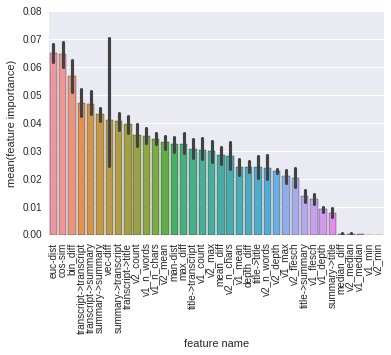

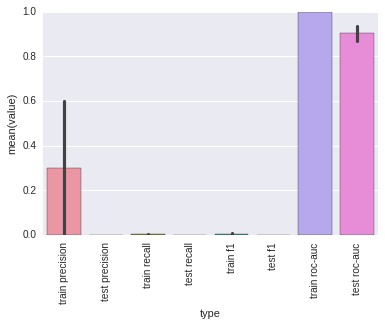

fit and predict on whole training data
('precission:', 0.0)
('recall:', 0.0)
('f1:', 0.0)
done


In [16]:
r = list()
fi = list()
false_pos = list()
pred_th = .9

def get_rf():
    return RandomForestClassifier(n_estimators=20,
                                  max_depth = 10,
                                  bootstrap = False,
                                  min_samples_leaf = 5, 
                                  n_jobs=16,
                                  random_state=2016)

for train_idx, test_idx in tqdm(train_test_split):
    train = df.iloc[train_idx].copy()
    test = df.iloc[test_idx].copy()
    
    scaler = RobustScaler()
    train[features] = scaler.fit_transform(train[features])
    test[features] = scaler.transform(test[features])
    
    clf = get_rf()
    #print(train[features])
    clf.fit(train[features], train[target], train['w'].values)
    
    true_class_idx = list(filter(lambda x: x[1] > 0, enumerate(clf.classes_)))[0][0]
    #print('class idx', clf.classes_, true_class_idx)
    
    train_pred = clf.predict_proba(train[features])[:, true_class_idx]
    train_true = train[target]
    test_pred = clf.predict_proba(test[features])[:, true_class_idx]
    test_true = test[target]
    train_w = train['w']
    test_w = test['w']
    train_w = None
    test_w = None
    r.append(('train precision', precision_score(train_true, train_pred > pred_th, sample_weight=train_w)))
    r.append(('test precision', precision_score(test_true, test_pred > pred_th, sample_weight=test_w)))
    r.append(('train recall', recall_score(train_true, train_pred > pred_th, sample_weight=train_w)))
    r.append(('test recall', recall_score(test_true, test_pred > pred_th, sample_weight=test_w)))
    r.append(('train f1', f1_score(train_true, train_pred > pred_th, sample_weight=train_w)))
    r.append(('test f1', f1_score(test_true, test_pred > pred_th, sample_weight=test_w)))
    r.append(('train roc-auc', roc_auc_score(train_true, train_pred, sample_weight=train_w)))
    r.append(('test roc-auc', roc_auc_score(test_true, test_pred, sample_weight=test_w)))
    false_pos.append(('train', filter_false_pos(train, train_true, train_pred, pred_th = pred_th)))
    false_pos.append(('test', filter_false_pos(test, test_true, test_pred, pred_th = pred_th)))
    
    fi.append(zip(clf.feature_importances_, features))
fi = [j for i in fi for j in i]
fi = pd.DataFrame(columns=['feature importance', 'feature name'], 
             data=fi)
order = list(fi.groupby(by='feature name').mean().sort_values(by='feature importance', ascending=False).index)
sns.barplot(x='feature name', y='feature importance', data=fi, order=order)
plt.xticks(rotation=90)
plt.show()
r = pd.DataFrame(columns=['type', 'value'], data=r)
sns.barplot(x='type', y='value', data=r)
plt.xticks(rotation=90)
plt.ylim([0.,1.])
plt.show()
print('fit and predict on whole training data')
clf = get_rf()
clf.fit(df[features], df[target], df['w'].values)
true_class_idx = list(filter(lambda x: x[1] > 0, enumerate(clf.classes_)))[0][0]
df['rf_pred'] = clf.predict_proba(df[features])[:, true_class_idx]
print('precission:', precision_score(df[target], df['rf_pred'] > pred_th))
print('recall:', recall_score(df[target], df['rf_pred'] > pred_th))
print('f1:', f1_score(df[target], df['rf_pred'] > pred_th))
if not os.path.isdir('models'):
    os.makedirs('models')
joblib.dump(clf, 'models/random_forest.clf')
print('done')

In [40]:
train_false_pos = pd.concat(zip(*list(filter(lambda x: x[0] == 'train', false_pos)))[1])
test_false_pos = pd.concat(zip(*list(filter(lambda x: x[0] == 'test', false_pos)))[1])

In [41]:
train_false_pos = pd.DataFrame(train_false_pos.sort_values(by='y_pred', ascending=False)[['c1', 'c2', 'y_pred']].groupby(by='c1').apply(lambda x: set(x['c2'])))
print('possible new true prereq:', len(train_false_pos))
for c1, c2 in train_false_pos.iterrows():
    print(c1)
    for i in c2[0]:
        print('\t', i)

possible new true prereq: 37
ab testing
	 intro to computer science
add google maps to your android app
	 programming foundations with python
android auto development
	 programming foundations with python
android performance
	 advanced android app development
android tv and google cast development
	 intro to computer science
	 advanced android app development
android wear development
	 intro to computer science
	 advanced android app development
app monetization
	 linux command line basics
building high conversion web forms
	 how to use git and github
computational photography
	 intro to computer science
d game development with libgdx
	 intro to computer science
	 linux command line basics
	 advanced android app development
	 how to use git and github
	 android development for beginners
deep learning
	 how to use git and github
designing restful apis
	 programming foundations with python
	 how to use git and github
firebase essentials for android
	 android development for beginners
ful

In [26]:
test_false_pos = pd.DataFrame(test_false_pos.sort_values(by='y_pred', ascending=False)[['c1', 'c2', 'y_pred']].groupby(by='c1').apply(lambda x: set(x['c2'])))
for c1, c2 in test_false_pos.iterrows():
    print(c1)
    for i in c2[0]:
        print('\t', i)

android performance
	 advanced android app development
android tv and google cast development
	 advanced android app development
android wear development
	 advanced android app development
building high conversion web forms
	 how to use git and github
d game development with libgdx
	 linux command line basics
	 advanced android app development
	 how to use git and github
intro to information security
	 programming foundations with python
intro to ios app development with swift
	 how to use git and github
make your own 
	 intro to html and css


In [27]:
th = .9
rf_false_pos = df[(df['rf_pred'] > th) & ((df['rf_pred'] > th) != df[target])][['c1', 'c2', 'rf_pred', 'c_id', 'prereq_id']].groupby(by='c1')
for c1, (g_df) in rf_false_pos:
    print('=' * 80)
    print(colored(c1, 'blue'))
    for idx, (cid, c2, pid, y) in enumerate(g_df[['c_id', 'c2', 'prereq_id', 'rf_pred']].values):
        if idx==0:
            print(course_desc.loc[cid]['summary'])
            print('*' * 80)
            print(course_desc.loc[cid]['required_knowledge'])
        print('-' * 80)
        print('\t', colored(c2, 'red'), '\t', y)
        print(course_desc.loc[pid]['summary'])

android performance
If you’ve ever hit performance issues that affect your app’s usability, this course will teach you how to identify and diagnose your performance problems. By the end of this course, you’ll be able to perform exploratory tests, run profiling tools, use outputs to navigate to problematic code, and design a plan of attack to mitigate poor performance. You’ll also gain a higher level of understanding about how program code and the Android platform interact, which will help you optimize for performance in the future.
********************************************************************************
To get the most from this course, you should have experience developing apps in Java on Android devices, understand the basics of the Android life cycle, and know how to perform basic operations in a terminal.    

You also need access to an Android device, and working knowledge of Github, in order to follow along with the exercises. 

If you’ve never developed a working Android

In [ ]:
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.optimizers import RMSprop, SGD
from keras.regularizers import l2, activity_l2, activity_l1, l1l2, l1
from keras.callbacks import EarlyStopping

In [ ]:
num_pos = df[target].sum()
num_neg = len(df) - num_pos
print('pos groundtruth:', num_pos)
print('neg groundtruth:', num_neg)
pos_weight = 1. / num_pos
neg_weight = 1. / num_neg
df['w'] = df[target].apply(lambda x: pos_weight if x > 0 else neg_weight)

In [ ]:
def gen_nn(features, hidden_layers, verbose):
    if verbose:
        print('gen nn...')
    np.random.seed(2016)
    model = Sequential()
    num_features = len(features)
    output_activation = 'sigmoid'
    
    if verbose:
        print('input size:', num_features)
    for i, (n_neurons, activation, dropout) in enumerate(hidden_layers):
        if verbose:
            print('layer:', i, ' neurons:', n_neurons, ' - ', activation, ' dropout:', dropout)
        if i == 0:
            model.add(Dense(n_neurons, input_dim=num_features, **dense_kwargs))
        else:
            model.add(Dense(n_neurons, **dense_kwargs))
        #model.add(BatchNormalization(mode=0))
        model.add(Activation(activation))        
        if dropout > 0:
            model.add(Dropout(dropout))
            
    model.add(Dense(1, **dense_kwargs))
    model.add(Activation(output_activation))
    #model.compile(optimizer=RMSprop(lr=0.000001), loss='binary_crossentropy', metrics=['accuracy']) #binary_crossentropy, mse
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    #model.compile(optimizer=SGD(lr=0.000001, nesterov=True), loss='binary_crossentropy', metrics=['accuracy'])
    if verbose:
        print('output size:', 1, output_activation)
        print('done')
    return model

def model_acc(nn, X, y_true, weights, th=.5):
    y_pred = nn.predict(X)
    print('max', y_pred.max())
    print('min', y_pred.min())
    y_pred = y_pred > th
    return accuracy_score(y_true, y_pred, normalize=True, sample_weight=weights)

In [ ]:
hidden_layers = [(30, 'tanh', 0.3),
                (30, 'tanh', 0.3),
                (30, 'tanh', 0.3),
                (30, 'tanh', 0.3)]
epochs = 500
batch_size = 8
dense_kwargs = dict()
dense_kwargs["init"] = 'uniform'

In [ ]:
r = list()
fi = list()
false_pos = list()
pred_th = .8

for nn_idx, (train_idx, test_idx) in tqdm(enumerate(train_test_split[:1])):
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    
    train = df.iloc[train_idx].copy()
    test = df.iloc[test_idx].copy()
    train['w'] /= train['w'].sum()
    test['w'] /= test['w'].sum()
    scaler = StandardScaler()
    train[features] = scaler.fit_transform(train[features])
    test[features] = scaler.transform(test[features])
    
    nn_features = copy.copy(features)
    
    if True:
        pow_f = map(lambda x: 'pow_' + x, features)
        train[pow_f] = train[features]**2
        test[pow_f] = test[features]**2    
        nn_features += pow_f
        
    if True:
        sin_f = map(lambda x: 'sin_f' + x, features)
        train[sin_f] = np.sin(train[features]*2*np.pi)
        test[sin_f] = np.sin(test[features]*2*np.pi)
        nn_features += sin_f
    
    nn = gen_nn(nn_features, hidden_layers, verbose=nn_idx == 0)
    
    hist = nn.fit_generator(train[nn_features].values, train[target].values, 
                  nb_epoch=epochs, 
                  batch_size=batch_size, 
                  validation_data=(test[nn_features].values, test[target].values), 
                  shuffle=True,
                  sample_weight=train['w'].values,
                  callbacks=[early_stopping],
                  verbose=2 if nn_idx == 0 else 0)
    if nn_idx == 0:
        print(nn_features)

    data = zip(hist.history['loss'], hist.history['val_loss'])
    hist_df = pd.DataFrame(columns=['train', 'val'], data=data[1:])
    hist_df.plot(y=['train', 'val'], secondary_y=['val'])
    plt.show()
    #print(train[features])
    
    train_pred = nn.predict(train[nn_features].values)
    train_true = train[target]
    test_pred = nn.predict(test[nn_features].values)
    test_true = test[target]
    train_w = train['w']
    test_w = test['w']
    train_w = None
    test_w = None
    r.append(('train precision', precision_score(train_true, train_pred > pred_th, sample_weight=train_w)))
    r.append(('test precision', precision_score(test_true, test_pred > pred_th, sample_weight=test_w)))
    r.append(('train recall', recall_score(train_true, train_pred > pred_th, sample_weight=train_w)))
    r.append(('test recall', recall_score(test_true, test_pred > pred_th, sample_weight=test_w)))
    r.append(('train f1', f1_score(train_true, train_pred > pred_th, sample_weight=train_w)))
    r.append(('test f1', f1_score(test_true, test_pred > pred_th, sample_weight=test_w)))
    r.append(('train roc-auc', roc_auc_score(train_true, train_pred, sample_weight=train_w)))
    r.append(('test roc-auc', roc_auc_score(test_true, test_pred, sample_weight=test_w)))
    false_pos.append(('train', filter_false_pos(train, train_true, train_pred, pred_th = pred_th)))
    false_pos.append(('test', filter_false_pos(test, test_true, test_pred, pred_th = pred_th)))
    

r = pd.DataFrame(columns=['type', 'value'], data=r)
sns.barplot(x='type', y='value', data=r)
plt.xticks(rotation=90)
plt.ylim([0.,1.])
plt.show()

In [ ]:
train_false_pos = pd.concat(zip(*list(filter(lambda x: x[0] == 'train', false_pos)))[1])
test_false_pos = pd.concat(zip(*list(filter(lambda x: x[0] == 'test', false_pos)))[1])

In [ ]:
train_false_pos = pd.DataFrame(train_false_pos.sort_values(by='y_pred', ascending=False)[['c1', 'c2', 'y_pred']].groupby(by='c1').apply(lambda x: set(x['c2'])))
print('possible new true prereq:', len(train_false_pos))
for c1, c2 in train_false_pos.iterrows():
    print(c1)
    for i in c2[0]:
        print('\t', i)

In [ ]:
test_false_pos = pd.DataFrame(test_false_pos.sort_values(by='y_pred', ascending=False)[['c1', 'c2', 'y_pred']].groupby(by='c1').apply(lambda x: set(x['c2'])))
for c1, c2 in test_false_pos.iterrows():
    print(c1)
    for i in c2[0]:
        print('\t', i)